In [ ]:
%load_ext autoreload
%autoreload 2

Imports

In [1]:
from datapipeline_uc3 import Datapipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
import pickle
import sys

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\envs\prpms\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
import os
os.chdir('d:/Users/mokky/Documents/GitHub/nus-iss/PRS-PM-ISY5002-GROUP5/SystemCode')
print(os.getcwd())

d:\Users\mokky\Documents\GitHub\nus-iss\PRS-PM-ISY5002-GROUP5\SystemCode


In [2]:
# Function to show various error measurement
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    mse = np.mean((forecast - actual)**2)  # MSE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    mmape = np.mean(np.abs(forecast - actual) / np.abs(forecast)) # modified mape
    #corr = np.corrcoef(forecast, actual)[0,1]   # corr
    #mins = np.amin(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #maxs = np.amax(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    #return({'mape':mape, 'me':me, 'mae': mae, 
    #        'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
    #        'corr':corr, 'minmax':minmax})
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'mse':mse, 'rmse':rmse, 'mmape': mmape})

In [ ]:
dpl = Datapipeline()

Read raw data from file

In [ ]:
dict_hosp_filepaths = {
    'GHL': './Data Exploration/data/uc3/GHL_data_uc3.pkl',
    'MEH': './Data Exploration/data/uc3/MEH_data_uc3.pkl',
    'PEH': './Data Exploration/data/uc3/PEH_data_uc3.pkl',
    'PNH': './Data Exploration/data/uc3/PNH_data_uc3.pkl'}

In [ ]:
raw_data_path = './Data Exploration/data/uc3/BillEstimate.csv'
dict_hosp_filepaths = dpl.transform_raw_data(raw_data_path)
print(dict_hosp_filepaths)

Creating a train and test dataset.

In [ ]:
dict_X_train_file_paths = {}
dict_y_train_file_paths = {}
dict_X_test_file_paths = {}
dict_y_test_file_paths = {}
save_file_dir = None

for hosp in dict_hosp_filepaths:
    if save_file_dir is None:
        save_file_dir = os.path.dirname(dict_hosp_filepaths[hosp])
    X_train_file_paths, y_train_file_path, X_test_file_paths, y_test_file_path = dpl.transform_train_test_data(dict_hosp_filepaths[hosp])
    dict_X_train_file_paths[hosp] = X_train_file_paths
    dict_y_train_file_paths[hosp] = y_train_file_path
    dict_X_test_file_paths[hosp] = X_test_file_paths
    dict_y_test_file_paths[hosp] = y_test_file_path
    
print(dict_X_train_file_paths)
print(dict_y_train_file_paths)
print(dict_X_test_file_paths)
print(dict_y_test_file_paths)

Get feature importance from random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
for hosp in dict_X_train_file_paths:
    forest = RandomForestRegressor(random_state=42)
    forest.fit(df_train_X, df_train_y)
    pkl_file_path = f'{save_file_dir}/{hosp}_forest_model_uc3.pkl'
    with open(pkl_file_path, 'wb') as file:
        pickle.dump(forest, file)
    forest_file_path = pkl_file_path
    print(forest_file_path)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df_X_train,df_y_train)

# save model to file
pickle.dump(model, open(file_dir + "uc3_linreg_model_pkl.sav", "wb"))

LinearRegression()

In [7]:
y_pred = model.predict(df_X_test)

C:\ProgramData\Anaconda3\envs\prpms\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


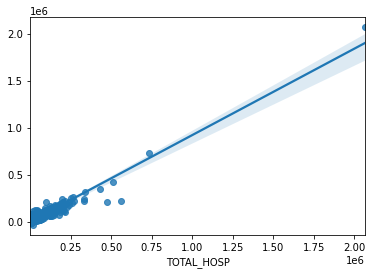

In [8]:
sns.regplot(df_y_test,y_pred)

In [9]:
# MSE
print('Mean squared error: %.2f'
      % mean_squared_error(df_y_test,y_pred, squared=True))

# RMSE
print('Root Mean squared error: %.2f'
      % mean_squared_error(df_y_test,y_pred, squared=False))

# MAE
print('Mean absolute error: %.2f'
      % mean_absolute_error(df_y_test,y_pred))

Mean squared error: 19514685.77
Root Mean squared error: 4417.54
Mean absolute error: 1897.96


In [10]:
forecast_accuracy(y_pred, df_y_test)

{'mape': 0.42281471146450256,
 'me': 0.15687787920150648,
 'mae': 1897.9644341835865,
 'mpe': 0.05096257679434669,
 'mse': 19514685.76989374,
 'rmse': 4417.542956202434}

Neural Networks ( Sequential )

In [11]:
NN_model = Sequential()

In [12]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df_X_train.shape[1], activation='relu'))

In [13]:
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

In [14]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [15]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               618240    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 783,105
Trainable params: 783,105
Non-trainable params: 0
_________________________________________________________________


In [16]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(df_X_train, df_y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

# save model to file
NN_model.save(file_dir + "uc3_NN_model.h5")

Train on 37510 samples, validate on 9378 samples
Epoch 1/100
 3008/37510 [=>............................] - ETA: 23:02:44 - loss: 5070.9256 - mean_absolute_error: 5070.9258

In [ ]:
predictions = NN_model.predict(df_X_test)

In [ ]:
sns.regplot(df_y_test,predictions)

In [ ]:
# MSE
print('Mean squared error: %.2f'
      % mean_squared_error(df_y_test,predictions, squared=True))

# RMSE
print('Root Mean squared error: %.2f'
      % mean_squared_error(df_y_test,predictions, squared=False))

# MAE
print('Mean absolute error: %.2f'
      % mean_absolute_error(df_y_test,predictions))

In [ ]:
forecast_accuracy(predictions, df_y_test)

In [168]:
model = RandomForestRegressor(verbose=1)
model.fit(df_X_train,df_y_train)

# save model to file
pickle.dump(model, open(file_dir + "uc3_rfreg_model_pkl.sav", "wb"))

RandomForestRegressor()

In [121]:
predicted_forest = model.predict(df_X_test)

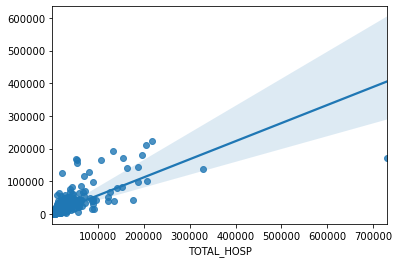

In [122]:
sns.regplot(df_y_test,predicted_forest)

In [123]:
# MSE
print('Mean squared error: %.2f'
      % mean_squared_error(df_y_test,predicted_forest, squared=True))

# RMSE
print('Root Mean squared error: %.2f'
      % mean_squared_error(df_y_test,predicted_forest, squared=False))

# MAE
print('Mean absolute error: %.2f'
      % mean_absolute_error(df_y_test,predicted_forest))

Mean squared error: 80450550.48
Root Mean squared error: 8969.42
Mean absolute error: 2069.38


In [124]:
forecast_accuracy(predicted_forest, df_y_test)

{'mape': 0.3468913216409671,
 'me': -396.2196567773451,
 'mae': 2069.38062649955,
 'mpe': 0.12120644860657105,
 'mse': 80450550.48315717,
 'rmse': 8969.423085302486}

In [125]:
XGBModel = XGBRegressor()
XGBModel.fit(df_X_train,df_y_train , verbose=True)

# save model to file
pickle.dump(model, open(file_dir + "uc3_xgbreg_model_pkl.sav", "wb"))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
XGBpredictions = XGBModel.predict(df_X_test)

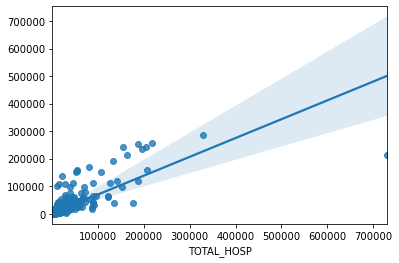

In [127]:
sns.regplot(df_y_test,XGBpredictions)

In [128]:
# MSE
print('Mean squared error: %.2f'
      % mean_squared_error(df_y_test,XGBpredictions, squared=True))

# RMSE
print('Root Mean squared error: %.2f'
      % mean_squared_error(df_y_test,XGBpredictions, squared=False))

# MAE
print('Mean absolute error: %.2f'
      % mean_absolute_error(df_y_test,XGBpredictions))

Mean squared error: 70582758.54
Root Mean squared error: 8401.35
Mean absolute error: 2097.85


In [129]:
forecast_accuracy(XGBpredictions, df_y_test)

{'mape': 0.4179715600785779,
 'me': 37.48459491954715,
 'mae': 2097.8492469866064,
 'mpe': 0.22924739651142068,
 'mse': 70582758.53612088,
 'rmse': 8401.354565551967}